# HR Analytics - Employee Attrition Prediction
This notebook performs EDA, builds classification models, and uses SHAP analysis to understand employee attrition.

In [39]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import shap

# Load dataset
df = pd.read_csv("HR_Analytics.csv")
df.head()


,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,RM297,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,...,3,80,0,0,2,3,0,0,0,0.0
1,RM302,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,...,1,80,0,0,2,3,0,0,0,0.0
2,RM458,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,...,4,80,0,0,3,3,0,0,0,0.0
3,RM728,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,...,4,80,0,0,2,3,0,0,0,0.0
4,RM829,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,...,4,80,0,0,0,3,0,0,0,0.0


In [40]:

df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmpID                     1480 non-null   object 
 1   Age                       1480 non-null   int64  
 2   AgeGroup                  1480 non-null   object 
 3   Attrition                 1480 non-null   object 
 4   BusinessTravel            1480 non-null   object 
 5   DailyRate                 1480 non-null   int64  
 6   Department                1480 non-null   object 
 7   DistanceFromHome          1480 non-null   int64  
 8   Education                 1480 non-null   int64  
 9   EducationField            1480 non-null   object 
 10  EmployeeCount             1480 non-null   int64  
 11  EmployeeNumber            1480 non-null   int64  
 12  EnvironmentSatisfaction   1480 non-null   int64  
 13  Gender                    1480 non-null   object 
 14  HourlyRa

EmpID                        0
Age                          0
AgeGroup                     0
Attrition                    0
BusinessTravel               0
DailyRate                    0
Department                   0
DistanceFromHome             0
Education                    0
EducationField               0
EmployeeCount                0
EmployeeNumber               0
EnvironmentSatisfaction      0
Gender                       0
HourlyRate                   0
JobInvolvement               0
JobLevel                     0
JobRole                      0
JobSatisfaction              0
MaritalStatus                0
MonthlyIncome                0
SalarySlab                   0
MonthlyRate                  0
NumCompaniesWorked           0
Over18                       0
OverTime                     0
PercentSalaryHike            0
PerformanceRating            0
RelationshipSatisfaction     0
StandardHours                0
StockOptionLevel             0
TotalWorkingYears            0
Training

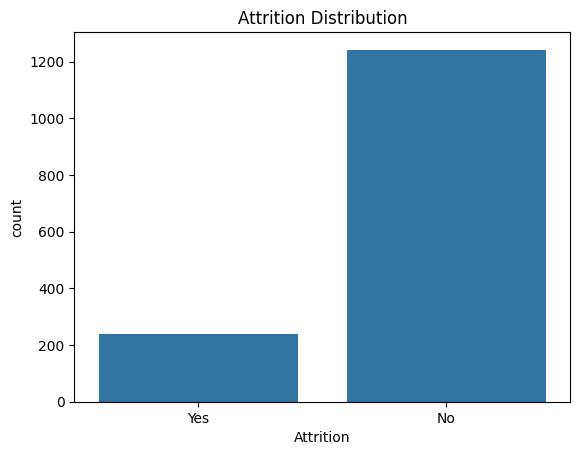

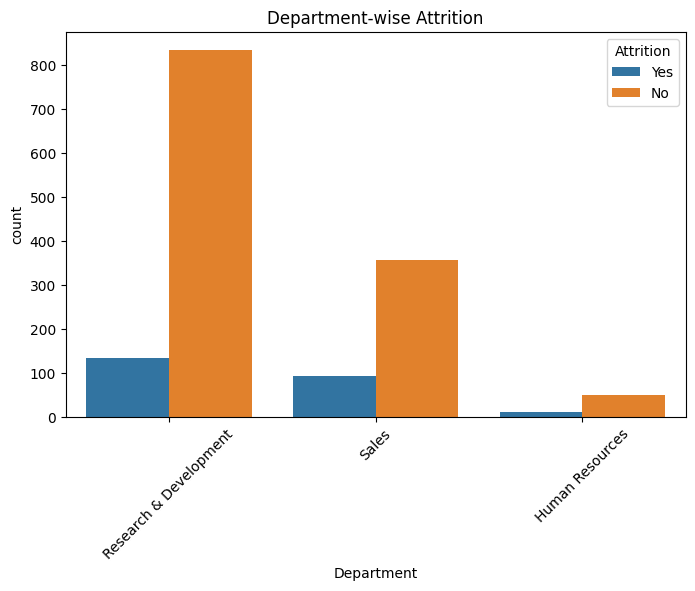

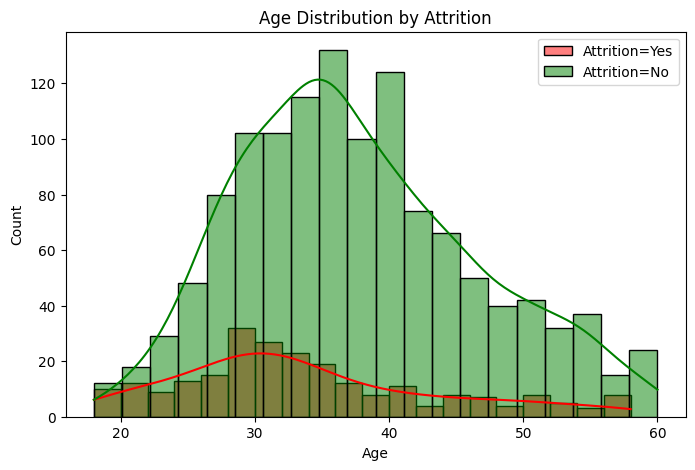

In [41]:

# Attrition distribution
sns.countplot(x='Attrition', data=df)
plt.title("Attrition Distribution")
plt.show()

# Department vs Attrition
plt.figure(figsize=(8,5))
sns.countplot(x='Department', hue='Attrition', data=df)
plt.title("Department-wise Attrition")
plt.xticks(rotation=45)
plt.show()

# Age distribution
plt.figure(figsize=(8,5))
sns.histplot(df[df['Attrition']=='Yes']['Age'], bins=20, color='red', kde=True, label='Attrition=Yes')
sns.histplot(df[df['Attrition']=='No']['Age'], bins=20, color='green', kde=True, label='Attrition=No')
plt.legend()
plt.title("Age Distribution by Attrition")
plt.show()


In [42]:
# Encode categorical variables
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

df_encoded = df.copy()
le = LabelEncoder()
for col in df_encoded.select_dtypes(include='object').columns:
    df_encoded[col] = le.fit_transform(df_encoded[col])

X = df_encoded.drop(['Attrition','EmpID'], axis=1)
y = df_encoded['Attrition']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


In [44]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd

# 1. Impute missing values
imputer = SimpleImputer(strategy='median')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# 2. Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

# 4. Logistic Regression
log_reg = LogisticRegression(max_iter=5000, solver='lbfgs', class_weight='balanced')
log_reg.fit(X_train, y_train)

# 5. Predictions & Evaluation
y_pred_log = log_reg.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))


Logistic Regression Accuracy: 0.7432432432432432
Confusion Matrix:
 [[277  96]
 [ 18  53]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.74      0.83       373
           1       0.36      0.75      0.48        71

    accuracy                           0.74       444
   macro avg       0.65      0.74      0.66       444
weighted avg       0.85      0.74      0.77       444



In [46]:

dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.8175675675675675
Confusion Matrix:
 [[343  30]
 [ 51  20]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.92      0.89       373
           1       0.40      0.28      0.33        71

    accuracy                           0.82       444
   macro avg       0.64      0.60      0.61       444
weighted avg       0.80      0.82      0.80       444



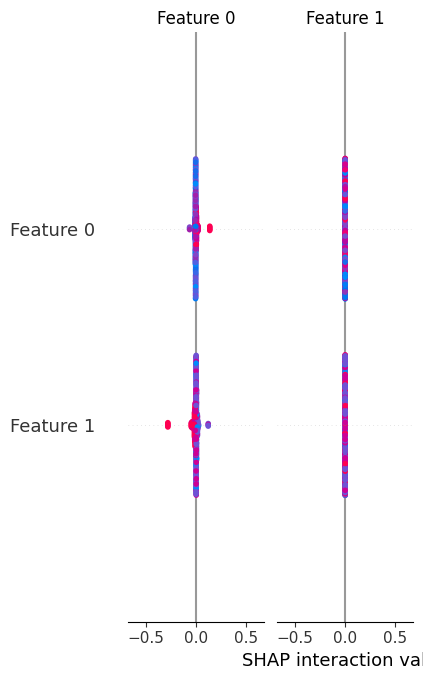

In [47]:

# SHAP for Decision Tree
explainer = shap.TreeExplainer(dt)
shap_values = explainer.shap_values(X_test)

# Feature importance
shap.summary_plot(shap_values, X_test, plot_type="bar")
